# Tutorial: Crystal Structures with Pymatgen

Now we import pymatgen and matplotlib (to display graphs) and create our first crystal structure (Zinc Blende, F $\bar{4}3$ m)

In [27]:
from pymatgen.core import Structure, Lattice
from plot_functions import display_structure
from pymatviz.widgets.structure import StructureWidget
import matplotlib.pyplot as plt

lattice = Lattice.from_parameters(a=3.84, b=3.84, c=3.84,
                                  alpha=60, beta=60, gamma=60)
species = ["Zn", "S"]
frac_coords = [[0, 0, 0], [0.25, 0.25, 0.25]]

struct = Structure(lattice, species, frac_coords, coords_are_cartesian=False)

# fig, ax = plt.subplots(tight_layout=True, figsize=(8,8))
# display_structure(struct, ax, miller_index=[-1,0,0], repeat=[2,2,1])
# plt.show()

StructureWidget(struct)

StructureWidget(structure={'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0.0, 'lattic…

We can also determine the spacegroup of any crystal that we create (pymatgen uses spglib under the hood)

In [13]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

spg = SpacegroupAnalyzer(struct)

print(f'Crystal System: {spg.get_crystal_system()}')
print(f'Lattice Type: {spg.get_lattice_type()}')
print(f'Hall Symbol: {spg.get_hall()}')
print(f'Point Group Symbol: {spg.get_point_group_symbol()}')
print(f'Space Group Symbol: {spg.get_space_group_symbol()}')
print(f'Space Group Number: {spg.get_space_group_number()}')

Crystal System: cubic
Lattice Type: cubic
Hall Symbol: F -4 2 3
Point Group Symbol: -43m
Space Group Symbol: F-43m
Space Group Number: 216


And it can also find and convert our structure between primitive and conventional cells.

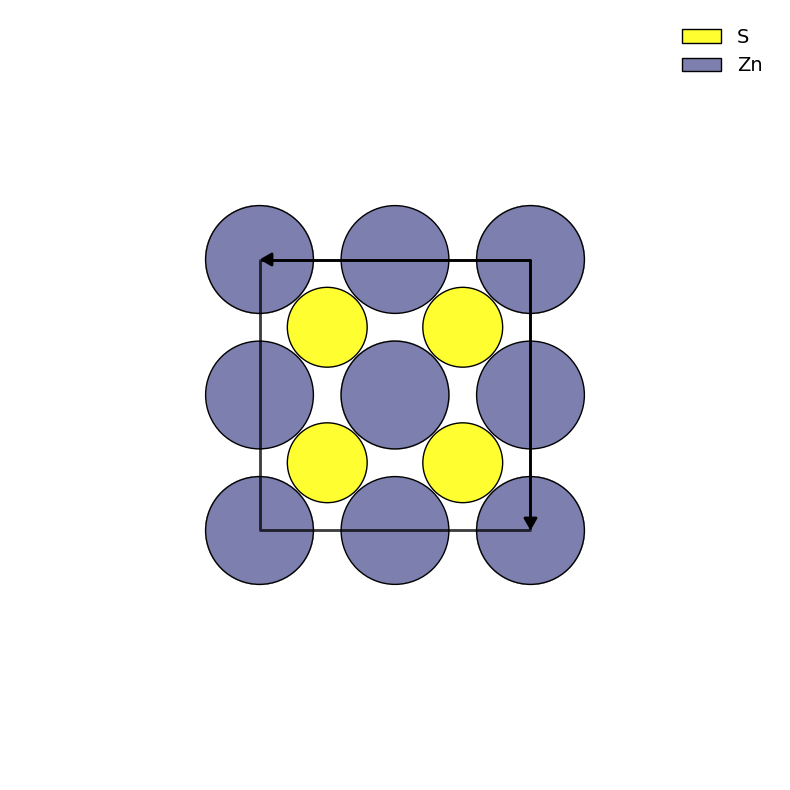

StructureWidget(structure={'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0.0, 'lattic…

In [25]:
struct_conv = spg.get_conventional_standard_structure()
struct_prim = spg.find_primitive()  # to find primitive

fig, ax = plt.subplots(tight_layout=True, figsize=(8,8))
display_structure(struct_conv, ax, miller_index=[1,0,0], repeat=[1,1,1])
plt.show()

StructureWidget(struct_conv)

Structures can also be created from a spacegroup

In [15]:
bcc_Mo = Structure.from_spacegroup("Im-3m", Lattice.cubic(3.1), ["Mo"], [[0, 0, 0]])
print(bcc_Mo.frac_coords)

# fig, ax = plt.subplots(tight_layout=True, figsize=(8,8))
# display_structure(bcc_Mo, ax, miller_index=[1,0,0], repeat=[1,1,1])
# plt.show()
StructureWidget(bcc_Mo)

[[0.  0.  0. ]
 [0.5 0.5 0.5]]


StructureWidget(structure={'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0.0, 'lattic…

Pymatgen enables us to easily manipulate structures and generate supercells and slabs

In [16]:
bcc_Mo = Structure.from_spacegroup("Im-3m", Lattice.cubic(3.1), ["Mo"], [[0, 0, 0]])
#bcc_Mo.make_supercell([1,2,1])
#  Pymatgen structures are lists of sites, so we can manipulate them like lists
#bcc_Mo[1] = 'N'
#bcc_Mo[3].frac_coords = [0.5, 0.7, 0.7]
#del bcc_Mo[2]
#bcc_Mo.append('O', [0, 0.25, 0.25])

print(bcc_Mo)
# fig, ax = plt.subplots(tight_layout=True, figsize=(8,8))
# display_structure(bcc_Mo, ax, miller_index=[1,0,0], repeat=[1,1,1])
# plt.show()
StructureWidget(bcc_Mo)

Full Formula (Mo2)
Reduced Formula: Mo
abc   :   3.100000   3.100000   3.100000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Mo    0    0    0
  1  Mo    0.5  0.5  0.5


StructureWidget(structure={'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0.0, 'lattic…

And pymatgen can also export (and import) various files like .cif, .xyz, and DFT input files

In [17]:
bcc_Mo.to(filename='bcc_Mo.cif')
#bcc_Mo = Structure.from_file('bcc_Mo.cif') #to import a structure from a cif file

"# generated using pymatgen\ndata_Mo\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   3.10000000\n_cell_length_b   3.10000000\n_cell_length_c   3.10000000\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Mo\n_chemical_formula_sum   Mo2\n_cell_volume   29.79100000\n_cell_formula_units_Z   2\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Mo  Mo0  1  0.00000000  0.00000000  0.00000000  1\n  Mo  Mo1  1  0.50000000  0.50000000  0.50000000  1\n"

The `Lattice` object can be generated in various ways and can be a useful for crystallographic calculations

In [18]:
lattice_vec = Lattice([[3, 0, 0], [0, 4, 0], [0, 0, 6]])  # three lattice vectors as rows
lattice_param = Lattice.from_parameters(3, 4, 6, 90, 90, 90)  # a, b, c, alpha, beta, gamma
lattice_orth = Lattice.orthorhombic(3, 4, 6) # special case of orthorhombic lattice

lattice_vec == lattice_param == lattice_orth

True

In [19]:
print(f'Lattice volume: {lattice_orth.volume} A^3')
print(f'Lattice parameters: {lattice_orth.parameters}') # also accessible separate using a, b, c, alpha, beta, gamma, lengths, abc, angles
print(f'd_(1,2,0) = {round(lattice_orth.d_hkl((1, 2, 0)), 2)} A')  # d_hkl for interplanar spacing, length of normal vector to (hkl) plane
print(f'Closest distance between [0,0,0] and [0.5,0.5,0.5]: {round(lattice_orth.get_distance_and_image([0, 0, 0], [0.5, 0.5, 0.5])[0], 2)} A')
print(lattice_orth.get_cartesian_coords([0.5, 0.5, 0.5])) # get_fractional_coords for opposite conversion
lattice_orth.metric_tensor

Lattice volume: 72.0 A^3
Lattice parameters: (3.0, 4.0, 6.0, 90.0, 90.0, 90.0)
d_(1,2,0) = 1.66 A
Closest distance between [0,0,0] and [0.5,0.5,0.5]: 3.91 A
[1.5 2.  3. ]


array([[ 9.00000000e+00, -7.34788079e-16,  1.10218212e-15],
       [-7.34788079e-16,  1.60000000e+01,  1.46957616e-15],
       [ 1.10218212e-15,  1.46957616e-15,  3.60000000e+01]])

In [20]:
lattice_orth.reciprocal_lattice
#reciprocal_lattice_crystallographic does not use the 2*pi factor

Lattice
    abc : 2.0943951023931953 1.5707963267948966 1.0471975511965976
 angles : 90.0 90.0 90.0
 volume : 3.445141853366646
      A : np.float64(2.0943951023931953) np.float64(1.2824471291478598e-16) np.float64(0.0)
      B : np.float64(0.0) np.float64(1.5707963267948966) np.float64(0.0)
      C : np.float64(-6.412235645739299e-17) np.float64(-6.412235645739299e-17) np.float64(1.0471975511965976)
    pbc : True True True

(0.0, 110.0)

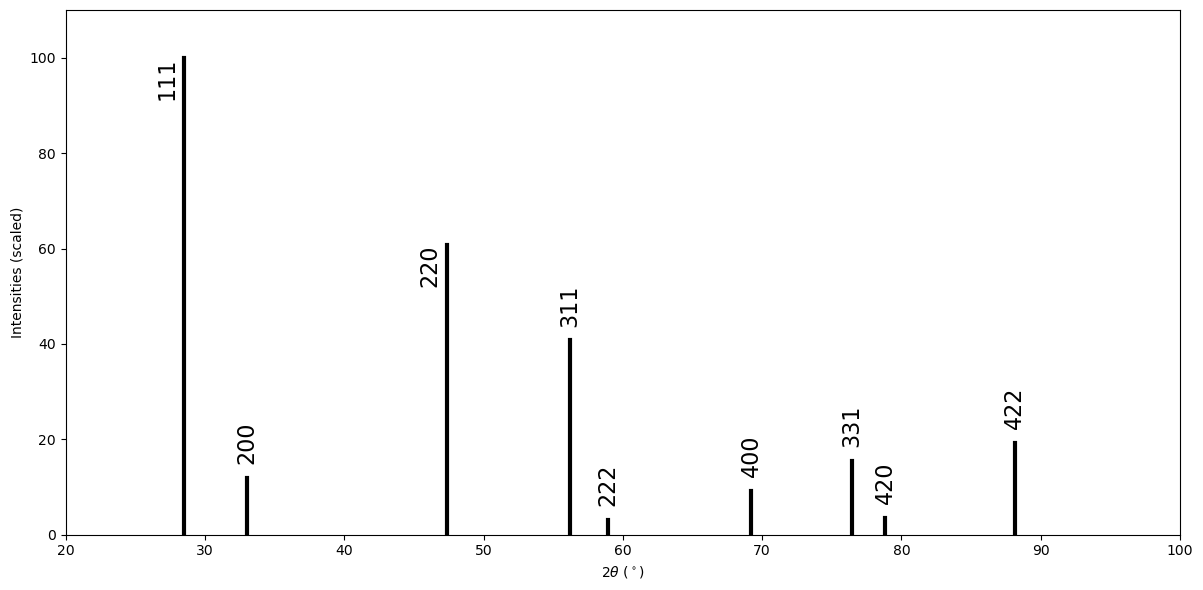

In [21]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator

fig, ax = plt.subplots(tight_layout=True, figsize=(12,6))
XRDCalculator(wavelength='CuKa').get_plot(struct_conv, two_theta_range=(0,90), ax=ax)
plt.xlim([20,100])
plt.ylim([0,110])

## Exercise 7.1:
Let's create a Si-doped GaAs structure. GaAs is a Zinc Blende structure, similar to the diamond structure of Si (just that there are 2 different types of chemical species present in the unit cell). To practice the concepts from above, create a primitive FCC Si structure and then replace the two Si atoms in the primitive unit cell with Ga and As. Convert the structure to a conventional cell and verify that the lattice constant is 5.44. Lastly, create a 2x2x2 supercell and replace one of the Ga atoms with Si, then export it as a `.cif`. Optionally, plot the Cu-K$\alpha$ XRD pattern of the structure.

In [22]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# 1. Create the primitive lattice of FCC Si (lattice constant for the primitive cell is 3.85 and all angles 60 degrees)
lattice_fcc_Si = Lattice.#...
fcc_Si_primitive = Structure(lattice_fcc_Si, ["Si"]*2, [[0, 0, 0], [0.25, 0.25, 0.25]])

# 2. Replace Si atoms with Ga and As
# ...
# ...
#
# 3. Convert the primitive cell to the conventional cell
spg = SpacegroupAnalyzer(fcc_Si_primitive)
fcc_Si = spg.get_conventional_standard_structure()
print(struct_conv.lattice.a)
# 4. Make a 2x2x2 supercell
fcc_Si.make_supercell([2, 2, 2])
# 5. Replace one of the Ga atoms with Si
# ...
# 6. Save the structure as a .cif file
fcc_Si.#...

print(fcc_Si)
# fig, ax = plt.subplots(tight_layout=True, figsize=(8,8))
# display_structure(fcc_Si, ax, miller_index=[1,0,0], repeat=[1,1,1])
# plt.show()
StructureWidget(fcc_Si)

SyntaxError: invalid syntax (2176022019.py, line 4)

## Exercise 7.2:
Create a cubic `Lattice` with $a=5\mathring{\mathrm{A}}$ and then create a `Structure` with the lattice and the listed `species` and `coords`. Determine the spacegroup information. Do you notice anything strange about this structure? If not, maybe [this paper](https://doi.org/10.1107/S0108768196002996) will give you a hint.

In [ ]:
lattice = Lattice.#...
species = ['Cu']*4 + ['S']*8
coords = [[0.7475,0.1,0.4975],[0.2525,0.6,0.5025],[0.2483,0.103,0.0019],
          [0.7517,0.603,0.9981],[0.853,0.998,0.106],[0.147,0.498,0.894],
          [0.137,0.993,0.606],[0.863,0.493,0.394],[0.644,0.208,0.896],
          [0.356,0.708,0.104],[0.3471,0.204,0.397],[0.6529,0.704,0.603]]
struc = Structure(lattice, species, coords)
spg = SpacegroupAnalyzer(struc)

print(f'Crystal System: {spg.get_crystal_system()}')
print(f'Lattice Type: {spg.get_lattice_type()}')
print(f'Hall Symbol: {spg.get_hall()}')
print(f'Point Group Symbol: {spg.get_point_group_symbol()}')
print(f'Space Group Symbol: {spg.get_space_group_symbol()}')
print(f'Space Group Number: {spg.get_space_group_number()}')

# fig, ax = plt.subplots(tight_layout=True, figsize=(8,8))
# display_structure(struc, ax, miller_index=[1,0,0], repeat=[1,1,1])
# plt.show()
StructureWidget(struc)

On a related note, textbooks often falsely prescribe the lattice parameters for the crystal systems. For example, you often see for triclinic that $a\neq b\neq c$ - this is however untrue, in general. The lattice parameters may be the same by coincidence (like in the previous example) but the underlying symmetry of the crystal might still be lower.

Hence, the correct way is to phrase these as constraints:

| Crystal System | Cell Constants | Cell Angles                       | Maximum Symmetry |
|----------------|----------------|-----------------------------------|------------------|
| Triclinic      | none           | none                              | $\bar{1}$              |
| Monoclinic     | none           | α = γ = 90°                       | 2/m              |
| Orthorhombic   | none           | α = β = γ = 90°                   | mmm              |
| Tetragonal     | a = b          | α = β = γ = 90°                   | 4/mmm            |
| Trigonal       | a = b          | α = β = 90°; γ = 120°             | $\bar{3}\mathrm{m}$              |
| Hexagonal      | a = b          | α = β = 90°; γ = 120°             | 6/mmm            |
| Cubic          | a = b = c      | α = β = γ = 90°                   | $\mathrm{m}\bar{3}\mathrm{m}$ | 